In [1]:
from __future__ import division
import csv
import numpy as np
import pandas as pd
import math
from scipy.optimize import bisect
import matplotlib.pyplot as plt
import pylab as pl
import os
get_ipython().magic(u'matplotlib inline')

In [8]:
from utils.Parameters import *
from utils.functions import *
from utils.LCA_assesment_model_centralized import LCA_assesment_model_centralized

In [10]:
grid_data=pd.read_csv('data/results_GIS_SF_3.csv')
grid_data=grid_data[grid_data.pop_density_current != 0]
scenario = 'branched'
status = 'current'

In [11]:
process_energy_results = pd.DataFrame()
process_GHG_results = pd.DataFrame()
total_energy_results = pd.DataFrame()
total_GHG_results = pd.DataFrame()

for index, row in grid_data.iterrows():
    grid_ID = int(row.grid_ID)
    slope_index_grid = float(row.slope_index)
    length_centralized_m = float(row.length_m)
    z_max_route = float(row.Head_central_elevation)
    pop_density = float(row.pop_density_current)
    collection_energy = float(row.collection_MJ_m3)
    length_centralized_const = float(row.actual_length)

    for people in people_range:
        process_energy, process_GHG, total_energy, total_GHG = LCA_assesment_model_centralized(people, scenario, status, grid_ID, slope_index_grid, length_centralized_m, z_max_route, pop_density, collection_energy, length_centralized_const)
        process_energy_results = process_energy_results.append(process_energy)
        process_GHG_results = process_GHG_results.append(process_GHG)
        total_energy_results = total_energy_results.append(total_energy)
        total_GHG_results = total_GHG_results.append(total_GHG)

process_energy_results.columns=['People','grid_ID', 'Pipe construction', 'Pipe operation', 
                              'Pump construction', 'Pump operation', 'Tank construction', 
                                    'Collection pumping', 'Secondary treatment operation', 'Secondary treatment construction',
                                    'Tertiary treatment operation', 'RO construction',
                                    'UV operation', 'UV construction', 'Chlorine manufacturing',
                                    'Chlorine tank manufacturing', 'Sludge transport']

process_GHG_results.columns=['People','grid_ID', 'Pipe construction', 'Pipe operation', 
                              'Pump construction', 'Pump operation', 'Tank construction', 
                                    'Collection pumping', 'Secondary treatment operation', 'Secondary treatment construction',
                                    'Tertiary treatment operation', 'RO construction',
                                    'UV operation', 'UV construction', 'Chlorine manufacturing',
                                    'Chlorine tank manufacturing', 'Sludge transport', 'landfill emissions']

total_energy_results.columns=['People','grid_ID', 'Total Energy']
total_GHG_results.columns=['People','grid_ID', 'Total GHG']

In [15]:
if not os.path.exists('result_csv'):
    os.makedirs('result_csv')

In [16]:
total_energy_results.to_csv('result_csv/Centralized_total_energy_%s_npr_SF.csv'%scenario)
total_GHG_results.to_csv('result_csv/Centralized_total_GHG_%s_npr_SF.csv'%scenario)
process_energy_results.to_csv('result_csv/Centralized_process_energy_%s_npr_SF.csv'%scenario)
process_GHG_results.to_csv('result_csv/Centralized_process_GHG_%s_npr_SF.csv'%scenario)

In [9]:
total_energy_results= pd.read_csv('result_csv/Centralized_total_energy_%s_npr_SF.csv'%scenario)
total_GHG_results= pd.read_csv('result_csv/Centralized_total_GHG_%s_npr_SF.csv'%scenario)
process_energy_results= pd.read_csv('result_csv/Centralized_process_energy_%s_npr_SF.csv'%scenario)
process_GHG_results= pd.read_csv('result_csv/Centralized_process_GHG_%s_npr_SF.csv'%scenario)

In [7]:
total_energy_decentralized = pd.read_csv('result_csv/Decentralized_total_energy_npr_SF_%s.csv'%status)
total_GHG_decentralized = pd.read_csv('result_csv/Decentralized_total_GHG_npr_SF_%s.csv'%status)

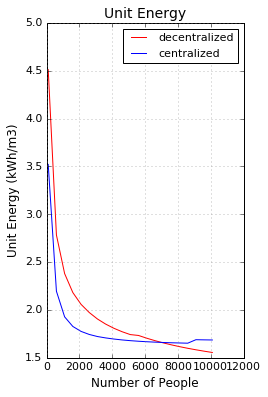

In [6]:
total_energy_decentralized_1=total_energy_decentralized[(total_energy_decentralized['grid_ID']==149)]
total_energy_1=total_energy_results[(total_energy_results['grid_ID']==149)]
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,3,1)
plt.title('Unit Energy',fontsize=14)
a=plt.plot(total_energy_decentralized_1['People'],total_energy_decentralized_1['Total Energy'],'-r',label = 'decentralized')
b=plt.plot(total_energy_1['People'],total_energy_1['Total Energy'],'-b',label = 'centralized')
legend = plt.legend(frameon = 1, fontsize=11,loc='best')
plt.ylabel('Unit Energy (kWh/m3)',fontsize=12)
plt.xlabel('Number of People',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.yaxis.grid(color='gray', linestyle=':')
ax.xaxis.grid(color='gray', linestyle=':')

In [7]:
grid_ID_decentral_energy = group_in_cluster(total_energy_decentralized,'grid_ID')
grid_ID_central_energy = group_in_cluster(total_energy_results,'grid_ID')
unique_grid_ID = total_energy_decentralized['grid_ID'].unique()
grid_ID_decentral_GHG = group_in_cluster(total_GHG_decentralized,'grid_ID')
grid_ID_central_GHG = group_in_cluster(total_GHG_results,'grid_ID')

In [8]:
min_people_energy = interpolate(unique_grid_ID, grid_ID_decentral_energy, grid_ID_central_energy, 'Total Energy')
min_people_GHG = interpolate(unique_grid_ID, grid_ID_decentral_GHG, grid_ID_central_GHG, 'Total GHG')

In [9]:
min_people_energy.to_csv('result_csv/min_people_energy_%s_npr_SF_%s.csv'%(scenario,status))
min_people_GHG.to_csv('result_csv/min_people_GHG_%s_npr_SF_%s.csv'%(scenario,status))